Model used: https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2
Model Notebook: https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_arbitrary_image_stylization.ipynb

In [49]:
!wget --content-disposition https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2?tf-hub-format=compressed

--2022-12-21 17:48:00--  https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2?tf-hub-format=compressed
Resolving tfhub.dev (tfhub.dev)... 142.251.208.110, 2a00:1450:4016:809::200e
Connecting to tfhub.dev (tfhub.dev)|142.251.208.110|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/tfhub-modules/google/magenta/arbitrary-image-stylization-v1-256/2.tar.gz [following]
--2022-12-21 17:48:00--  https://storage.googleapis.com/tfhub-modules/google/magenta/arbitrary-image-stylization-v1-256/2.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.36.240, 172.217.16.176, 142.251.36.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.36.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85627349 (82M) [application/x-tar]
Saving to: ‘magenta_arbitrary-image-stylization-v1-256_2.tar.gz’

magenta_arbitrary-i 100%[===================>]  81,66M  4,58MB

In [50]:
!tar -xf ./magenta_arbitrary-image-stylization-v1-256_2.tar.gz -C ./content/model/1

In [51]:
!DOCKER_BUILDKIT=1 docker-compose build

[+] Running 0/0
 ⠿ Container homework_5-model-server-1  Starting                           0.1s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.2s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.3s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.4s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.5s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.6s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.7s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.8s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           0.9s
[+] Running 0/1
 ⠿ Container homework_5-model-server-1  Starting                           1.0s
[+] Running 1/1
 ⠿ Container homework_5-

In [ ]:
!docker-compose up -d

In [53]:
import requests
import time
time.sleep(10)
response=requests.get('http://localhost:8501/v1/models/arbitrary-image-stylization/metadata')
# print(response.text)

In [54]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

import requests

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

content_urls = dict(
  sea_turtle='https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg',
  tuebingen='https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg',
  grace_hopper='https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg',
  )
style_urls = dict(
  kanagawa_great_wave='https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg',
  kandinsky_composition_7='https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
  hubble_pillars_of_creation='https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg',
  van_gogh_starry_night='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg',
  turner_nantes='https://upload.wikimedia.org/wikipedia/commons/b/b7/JMW_Turner_-_Nantes_from_the_Ile_Feydeau.jpg',
  munch_scream='https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg',
  picasso_demoiselles_avignon='https://upload.wikimedia.org/wikipedia/en/4/4c/Les_Demoiselles_d%27Avignon.jpg',
  picasso_violin='https://upload.wikimedia.org/wikipedia/en/3/3c/Pablo_Picasso%2C_1911-12%2C_Violon_%28Violin%29%2C_oil_on_canvas%2C_Kr%C3%B6ller-M%C3%BCller_Museum%2C_Otterlo%2C_Netherlands.jpg',
  picasso_bottle_of_rum='https://upload.wikimedia.org/wikipedia/en/7/7f/Pablo_Picasso%2C_1911%2C_Still_Life_with_a_Bottle_of_Rum%2C_oil_on_canvas%2C_61.3_x_50.5_cm%2C_Metropolitan_Museum_of_Art%2C_New_York.jpg',
  fire='https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg',
  derkovits_woman_head='https://upload.wikimedia.org/wikipedia/commons/0/0d/Derkovits_Gyula_Woman_head_1922.jpg',
  amadeo_style_life='https://upload.wikimedia.org/wikipedia/commons/8/8e/Untitled_%28Still_life%29_%281913%29_-_Amadeo_Souza-Cardoso_%281887-1918%29_%2817385824283%29.jpg',
  derkovtis_talig='https://upload.wikimedia.org/wikipedia/commons/3/37/Derkovits_Gyula_Talig%C3%A1s_1920.jpg',
  amadeo_cardoso='https://upload.wikimedia.org/wikipedia/commons/7/7d/Amadeo_de_Souza-Cardoso%2C_1915_-_Landscape_with_black_figure.jpg'
)

content_image_size = 384
style_image_size = 256
content_images = {k: load_image(v, (content_image_size, content_image_size)) for k, v in content_urls.items()}
style_images = {k: load_image(v, (style_image_size, style_image_size)) for k, v in style_urls.items()}
style_images = {k: tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME') for k, style_image in style_images.items()}

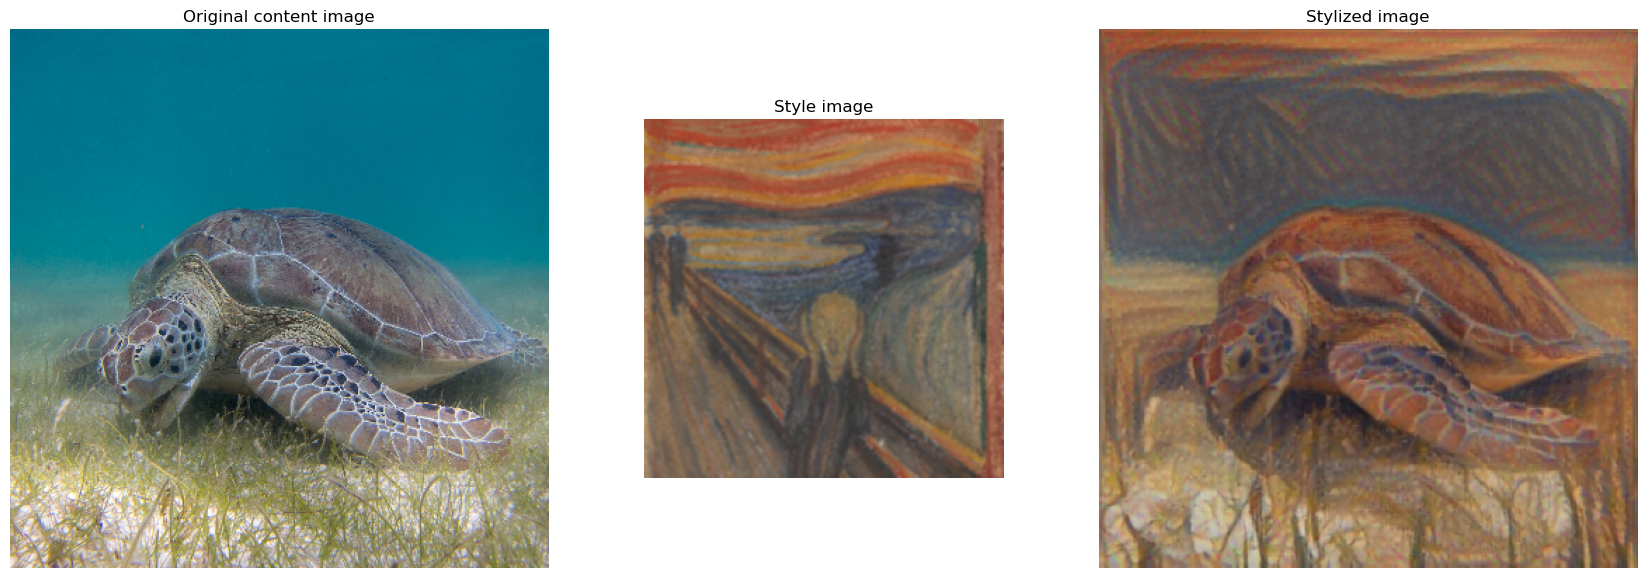

In [56]:
import json

content_name = 'sea_turtle' # @param ['sea_turtle', 'tuebingen', 'grace_hopper']
style_name = 'munch_scream'  # @param ['kanagawa_great_wave', 'kandinsky_composition_7', 'hubble_pillars_of_creation', 'van_gogh_starry_night', 'turner_nantes', 'munch_scream', 'picasso_demoiselles_avignon', 'picasso_violin', 'picasso_bottle_of_rum', 'fire', 'derkovits_woman_head', 'amadeo_style_life', 'derkovtis_talig', 'amadeo_cardoso']

#stylized_image = hub_module(tf.constant(content_images[content_name]),tf.constant(style_images[style_name]))[0]
headers = {"content-type": "application/json"}
#show_n([content_images[content_name], style_images[style_name], stylized_image],titles=['Original content image', 'Style image', 'Stylized image'])
data = json.dumps({"signature_name": "serving_default",
                   "instances": [{"placeholder": content_images[content_name].numpy().tolist()[0],
                                 "placeholder_1": style_images[style_name].numpy().tolist()[0]}]})

response=requests.post('http://localhost:8501/v1/models/arbitrary-image-stylization:predict', data=data, headers=headers)
show_n([content_images[content_name], style_images[style_name], np.array(response.json()['predictions'])],
       titles=['Original content image', 'Style image', 'Stylized image'])
# with open("apiresponse.json","w") as f:
#     json.dump(json.loads(response.text),f)

In [ ]:
import webbrowser
webbrowser.open('http://localhost:8050', new=2)